<a href="https://colab.research.google.com/github/Dinith-Thejana/Assignment_2B/blob/main/models/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploads = files.upload()

Saving traffic_cleaned.csv to traffic_cleaned.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('traffic_cleaned.csv')
df.head(20)

,SCATS Number,Location,Date,Interval,Volume,Time,DateTime
0,970,WARRIGAL_RD N of HIGH STREET_RD,2006-10-01,V00,86,00:00,2006-10-01 00:00:00
1,970,WARRIGAL_RD N of HIGH STREET_RD,2006-10-02,V00,32,00:00,2006-10-02 00:00:00
2,970,WARRIGAL_RD N of HIGH STREET_RD,2006-10-03,V00,26,00:00,2006-10-03 00:00:00
3,970,WARRIGAL_RD N of HIGH STREET_RD,2006-10-04,V00,32,00:00,2006-10-04 00:00:00
4,970,WARRIGAL_RD N of HIGH STREET_RD,2006-10-05,V00,40,00:00,2006-10-05 00:00:00
5,970,WARRIGAL_RD N of HIGH STREET_RD,2006-10-06,V00,36,00:00,2006-10-06 00:00:00
6,970,WARRIGAL_RD N of HIGH STREET_RD,2006-10-07,V00,62,00:00,2006-10-07 00:00:00
7,970,WARRIGAL_RD N of HIGH STREET_RD,2006-10-08,V00,116,00:00,2006-10-08 00:00:00
8,970,WARRIGAL_RD N of HIGH STREET_RD,2006-10-09,V00,23,00:00,2006-10-09 00:00:00
9,970,WARRIGAL_RD N of HIGH STREET_RD,2006-10-10,V00,27,00:00,2006-10-10 00:00:00


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [12]:
df['DateTime'] = pd.to_datetime(df['DateTime'])


daily_volume = df.groupby('Date')['Volume'].sum().reset_index()

# Normalize volume data
scaler = MinMaxScaler()
daily_volume['Volume_scaled'] = scaler.fit_transform(daily_volume[['Volume']])

In [13]:
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)


In [14]:
sequence_length = 7  # Use 7 days to predict next
volume_data = daily_volume['Volume_scaled'].values
X, y = create_sequences(volume_data, sequence_length)


In [15]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [16]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [17]:
model = Sequential()
model.add(SimpleRNN(64, activation='tanh', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.1, verbose=1)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - loss: 0.4679 - val_loss: 0.0489
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1173 - val_loss: 0.3026
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1014 - val_loss: 0.2619
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0832 - val_loss: 0.1601
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0453 - val_loss: 0.1003
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0314 - val_loss: 0.0934
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0286 - val_loss: 0.1307
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0200 - val_loss: 0.1719
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0185 - val_loss: 0.1943
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0198 - val_loss: 0.1775
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0236 - val_loss: 0.1543
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0195 - val_loss: 0.1458


In [19]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


In [20]:
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)


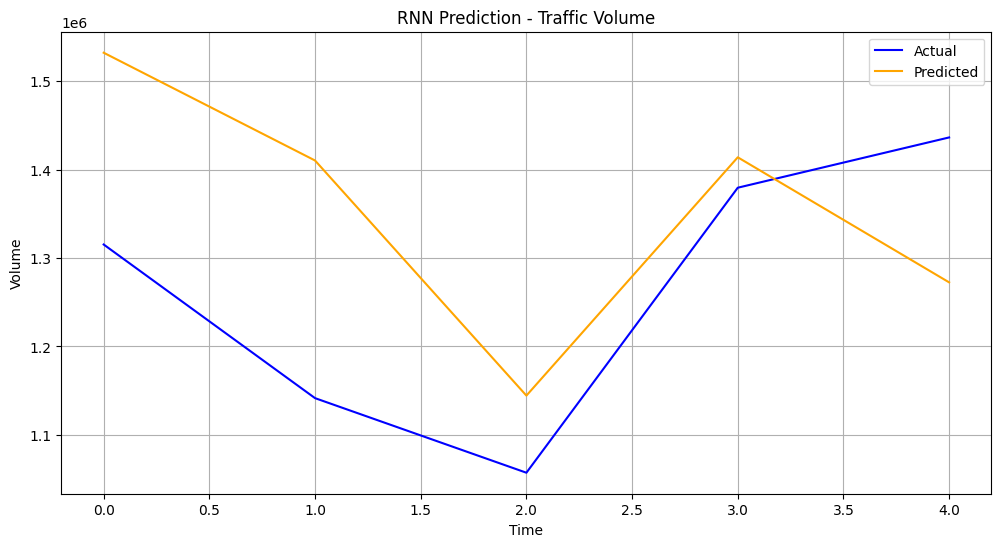

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual', color='blue')
plt.plot(y_pred_inv, label='Predicted', color='orange')
plt.title("RNN Prediction - Traffic Volume")
plt.xlabel("Time")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.show()


In [22]:
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 176104.53
